In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
MINE = '/net/topmed10/working/porchard/rnaseq/work/test-crossmap/results/cross_mappability/crossmap.txt'
THEIRS = '/net/topmed10/working/porchard/rnaseq/data/mappability/hg38_cross_mappability_strength.txt.gz'

In [3]:
mine = pd.read_csv(MINE, sep='\t', header=None, names=['gene1', 'gene2', 'mine'])
theirs = pd.read_csv(THEIRS, sep='\t', header=None, names=['gene1', 'gene2', 'theirs'])
mine.head()

,gene1,gene2,mine
0,ENSG00000224553.1,ENSG00000235459.5,58
1,ENSG00000224553.1,ENSG00000196656.7,127
2,ENSG00000224553.1,ENSG00000223416.3,55
3,ENSG00000224553.1,ENSG00000227887.1,18
4,ENSG00000224553.1,ENSG00000243538.1,9


In [4]:
len(theirs)

37245800

In [5]:
len(mine)

37312100

In [6]:
comb = mine.merge(theirs, how='outer')
comb.head()

,gene1,gene2,mine,theirs
0,ENSG00000224553.1,ENSG00000235459.5,58.0,58.0
1,ENSG00000224553.1,ENSG00000196656.7,127.0,127.0
2,ENSG00000224553.1,ENSG00000223416.3,55.0,55.0
3,ENSG00000224553.1,ENSG00000227887.1,18.0,18.0
4,ENSG00000224553.1,ENSG00000243538.1,9.0,9.0


In [7]:
comb.mine = comb.mine.fillna(0).astype(int)
comb.theirs = comb.theirs.fillna(0).astype(int)

In [8]:
(comb.mine == comb.theirs).value_counts()

True     37235817
False       83754
dtype: int64

In [9]:
(comb.mine == comb.theirs).mean() # very high concordance...

0.9977557619834376

Text(0, 0.5, 'My crossmapping score')

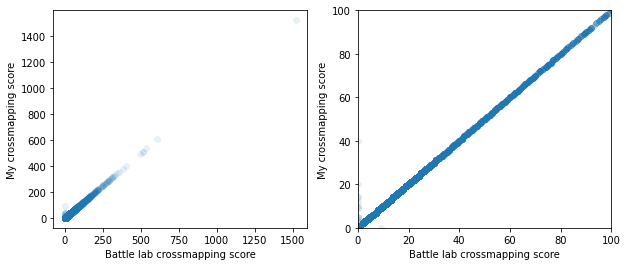

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(2*5, 4))

ax = axs[0]
sns.scatterplot(x='theirs', y='mine', data=comb.sample(n=10000), ax=ax, edgecolor=None, alpha=0.1)
ax.set_xlabel('Battle lab crossmapping score')
ax.set_ylabel('My crossmapping score')

ax = axs[1]
sns.scatterplot(x='theirs', y='mine', data=comb.sample(n=10000), ax=ax, edgecolor=None, alpha=0.1)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xlabel('Battle lab crossmapping score')
ax.set_ylabel('My crossmapping score')